In [59]:
import numpy
import pandas
from numpy import matrix, linalg, linspace, interp, asarray, argmax
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib notebook

## Tutorial 8b - Navigating concentrations and rates in Python

Before we go on to Chapter 6 we want to ensure that we have mastered the basic skills of playing with fermenter concentrations and rates in Jupyter notebooks. The purpuse of this tutorial is to improve your Python skills in this regard. So today we are more concerned about getting the right numbers than interpreting the numbers. Interpretation will follow later when  your notebook skillset is better developed. 

Let's take the metabolic network from semester test 1. 

<img src="mapst1.png" width="400" />

The correct matrix (not the hidden one like in the semester test) can be obtained here:  [matrixst1.xlsx](https://github.com/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/Tut%208b/matrixst1.xlsx). Please note that the Excel file requires some modification before it can be imported. Also the matrix still requires some specification lines. Best to add the specifications in the notebook itself. 

a) Import the matrix, neglect glycerol formation and assume that $\mu=0.18$. Determine the biomass based rate of malic acid production $r_M$.Note that all additional physiological parameters are given in the supplied matrix (don't forget the $\theta$ spec) [$r_M=0.155$].

Please note that the rates determined from the _linalg_ solution are in matrix format (eventhough there is just one column). To obtain elements from the rate matrix the row and column number must be supplied.

We will be using the above matrix directly in the response function. Rename the matrix as S1. We will assume for now that oxygen supply is in excess. All parameters are given. Note that $\mu$ is not a constant like in Tut 8. Below the response function:

In [60]:
theta = 0.1
mu = 0.18

import pandas, numpy
S = numpy.matrix(pandas.read_excel('matrixst1.xlsx'))
S1 = numpy.vstack([S,[0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0]])
    
C = numpy.matrix([0, 0,0,0,0,0, theta, mu,0]).T
Y = numpy.linalg.solve(S1, C)

print(Y)

[[0.43431724]
 [0.18      ]
 [0.23271724]
 [0.        ]
 [0.23271724]
 [0.07757241]
 [0.15514483]
 [0.15514483]
 [0.13075862]]


b) Plot $C_X,C_S,C_M$ upto 80 hours, using a similar procedure to tut8. Allow for a smooth plot.

In [61]:

def response_fun(C):
    Cx, Cs, Cm = C
    mumax, thetamax, a, b =0.18,0.1, 0.004, 0.1
    mu=mumax*Cs/(a + Cs)*(1+Cm/b)**(-1)  # Note the mu dependence on Cs and Cm 🧐
    theta=thetamax*Cs/(a + Cs)
    
    S = numpy.matrix(pandas.read_excel('matrixst1.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0]])
    
    K = numpy.matrix([0,0,0,0,0,0, theta, mu,0]).T
    r = numpy.linalg.solve(S1, K) 
        
    
    return [r[1,0],   # important to see the order of the rates (X,S,M)
           -r[0,0],   # glucose, note the negative since the flux model calculated (-rs)
            r[7,0]]   # malic acid   





In [62]:

def ferm_eq(C,t):
    Cx, Cs, Cm = C[0],C[1],C[2]  # order of components very important 
    r=response_fun([Cx, Cs, Cm])      # this is the 'fetching' from the response function

    return [r[0]*Cx,
            r[1]*Cx,    
            r[2]*Cx,]

In [63]:
Co =[0.01, 90/30, 0]                # Cxo, Cso, Cmo in cmol/L
tmax=80                             # Integrate for 80 hours  
tspan=numpy.linspace(0,tmax,500)    # define the timespan of the integration
C = odeint(ferm_eq, Co, tspan)      # integration via odeint that calls upon ferm_eq

Cx, Cs, Cm = C.T

plt.plot(tspan, Cm, color='orange', label='m')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()



<IPython.core.display.Javascript object>

c) Now complete the table below:

<img src="table_t8.png" width="500" />

In [64]:
r = asarray([response_fun(C) for C in C])
rx = r[:,0]
rs = r[:,1]
rm = r[:,2]
Cx = C[:,0]
Cs = C[:,1]
Cm = C[:,2]

rx_v = rx*Cx
rs_v = rs*Cx
rm_v = rm*Cx

plt.figure(2)
plt.plot(tspan, rx, color = 'green', label = 'rx')
plt.plot(tspan, rs, color = 'blue', label = 'rs')
plt.plot(tspan, rm, color = 'red', label = 'rm')
plt.xlabel('t (h)')
plt.ylabel('Rate (cmol/cmolX)')
plt.legend(loc='best')
#plt.grid()
plt.show()



<IPython.core.display.Javascript object>

In [65]:
findCx0 = interp(0,tspan,Cx)
#print ('at t = 0 hours, Cx = ', findCx, 'cmolX/Lh')
print ('at t = 0 hours, Cx = ', findCx0, 'cmolX/L')
print ('  ')

findCs0 = interp(0,tspan,Cs)
#print ('at t = 0 hours, Cs = ', findCs, 'cmolS/Lh')
print ('at t = 0 hours, Cs = ', findCs0, 'cmolS/L')
print ('  ')

findCm0 = interp(0,tspan,Cm)
#print ('at t = 0 hours, Cm = ', findCm, 'cmolm/Lh')
print ('at t = 0 hours, Cm = ', findCm0, 'cmolm/L')
print ('  ')

findrx0 = interp(0,tspan,rx)
print ('at t = 0 hours, rx = ', findrx0, '1/h')
print ('  ')

findrs0 = interp(0,tspan,rs)
print ('at t = 0 hours, rs = ', findrs0, 'cmols/cmolx.h')
print ('  ')

findrm0 = interp(0,tspan,rm)
print ('at t = 0 hours, rm = ', findrm0, 'cmolm/cmolx.h')
print ('  ')

findrx_v0 = interp(0,tspan,rx_v)
print ('at t = 0 hours, rx_v = ', findrx_v0, 'cmolX/L.h')
print ('  ')

findrs_v0 = interp(0,tspan,rs_v)
print ('at t = 0 hours, rx_s = ', findrs_v0, 'cmols/L.h')
print ('  ')

findrm_v0 = interp(0,tspan,rm_v)
print ('at t = 0 hours, rx_vm= ', findrm_v0, 'cmolm/L.h')
print ('  ')
         

at t = 0 hours, Cx =  0.01 cmolX/L
  
at t = 0 hours, Cs =  3.0 cmolS/L
  
at t = 0 hours, Cm =  0.0 cmolm/L
  
at t = 0 hours, rx =  0.17976031957390146 1/h
  
at t = 0 hours, rs =  -0.43373892279952814 cmols/cmolx.h
  
at t = 0 hours, rm =  0.15493824325117234 cmolm/cmolx.h
  
at t = 0 hours, rx_v =  0.0017976031957390147 cmolX/L.h
  
at t = 0 hours, rx_s =  -0.004337389227995281 cmols/L.h
  
at t = 0 hours, rx_vm=  0.0015493824325117235 cmolm/L.h
  


In [66]:
findCx15 = interp(15,tspan,Cx)
#print ('at t = 0 hours, Cx = ', findCx, 'cmolX/Lh')
print ('at t = 15 hours, Cx = ', findCx15, 'cmolX/L')
print ('  ')

findCs15 = interp(15,tspan,Cs)
#print ('at t = 0 hours, Cs = ', findCs, 'cmolS/Lh')
print ('at t = 15 hours, Cs = ', findCs15, 'cmolS/L')
print ('  ')

findCm15 = interp(15,tspan,Cm)
#print ('at t = 0 hours, Cm = ', findCm, 'cmolm/Lh')
print ('at t = 15 hours, Cm = ', findCm15, 'cmolm/L')
print ('  ')

findrx15 = interp(15,tspan,rx)
print ('at t = 15 hours, rx = ', findrx15, '1/h')
print ('  ')

findrs15 = interp(15,tspan,rs)
print ('at t = 15 hours, rs = ', findrs15, 'cmols/cmolx.h')
print ('  ')

findrm15 = interp(15,tspan,rm)
print ('at t = 15 hours, rm = ', findrm15, 'cmolm/cmolx.h')
print ('  ')

findrx_v15 = interp(15,tspan,rx_v)
print ('at t = 15 hours, rx_v = ', findrx_v15, 'cmolX/L.h')
print ('  ')

findrs_v15 = interp(15,tspan,rs_v)
print ('at t = 15 hours, rx_s = ', findrs_v15, 'cmols/L.h')
print ('  ')

findrm_v15 = interp(15,tspan,rm_v)
print ('at t = 15 hours, rx_vm= ', findrm_v15, 'cmolm/L.h')
print ('  ')

at t = 15 hours, Cx =  0.08879475099293892 cmolX/L
  
at t = 15 hours, Cs =  2.8017868910415387 cmolS/L
  
at t = 15 hours, Cm =  0.07330865856424655 cmolm/L
  
at t = 15 hours, rx =  0.10371473299310956 1/h
  
at t = 15 hours, rs =  -0.2720978518223424 cmols/cmolx.h
  
at t = 15 hours, rm =  0.10395823391337315 cmolm/cmolx.h
  
at t = 15 hours, rx_v =  0.009209002079840318 cmolX/L.h
  
at t = 15 hours, rx_s =  -0.024160176947399154 cmols/L.h
  
at t = 15 hours, rx_vm=  0.009230729745318666 cmolm/L.h
  


In [67]:
findCx30 = interp(30,tspan,Cx)
#print ('at t = 0 hours, Cx = ', findCx, 'cmolX/Lh')
print ('at t = 30 hours, Cx = ', findCx30, 'cmolX/L')
print ('  ')

findCs30 = interp(30,tspan,Cs)
#print ('at t = 0 hours, Cs = ', findCs, 'cmolS/Lh')
print ('at t = 30 hours, Cs = ', findCs30, 'cmolS/L')
print ('  ')

findCm30 = interp(30,tspan,Cm)
#print ('at t = 0 hours, Cm = ', findCm, 'cmolm/Lh')
print ('at t = 30 hours, Cm = ', findCm30, 'cmolm/L')
print ('  ')

findrx30 = interp(30,tspan,rx)
print ('at t = 30 hours, rx = ', findrx30, '1/h')
print ('  ')

findrs30 = interp(30,tspan,rs)
print ('at t = 30 hours, rs = ', findrs30, 'cmols/cmolx.h')
print ('  ')

findrm30 = interp(30,tspan,rm)
print ('at t = 30 hours, rm = ', findrm30, 'cmolm/cmolx.h')
print ('  ')

findrx_v30 = interp(30,tspan,rx_v)
print ('at t = 30 hours, rx_v = ', findrx_v30, 'cmolX/L.h')
print ('  ')

findrs_v30 = interp(30,tspan,rs_v)
print ('at t = 30 hours, rx_s = ', findrs_v30, 'cmols/L.h')
print ('  ')

findrm_v30 = interp(30,tspan,rm_v)
print ('at t = 30 hours, rx_vm= ', findrm_v30, 'cmolm/L.h')
print ('  ')

at t = 30 hours, Cx =  0.2594155464405307 cmolX/L
  
at t = 30 hours, Cs =  2.3072660591194842 cmolS/L
  
at t = 30 hours, Cm =  0.2755923525780806 cmolm/L
  
at t = 30 hours, rx =  0.04784164120587992 1/h
  
at t = 30 hours, rs =  -0.15332285454350164 cmols/cmolx.h
  
at t = 30 hours, rm =  0.06649347759527742 cmolm/cmolx.h
  
at t = 30 hours, rx_v =  0.01241078908354924 cmolX/L.h
  
at t = 30 hours, rx_s =  -0.03977416962324789 cmols/L.h
  
at t = 30 hours, rx_vm=  0.017249390566448492 cmolm/L.h
  


In [68]:
findCx45 = interp(45,tspan,Cx)
#print ('at t = 0 hours, Cx = ', findCx, 'cmolX/Lh')
print ('at t = 45 hours, Cx = ', findCx45, 'cmolX/L')
print ('  ')

findCs45 = interp(45,tspan,Cs)
#print ('at t = 0 hours, Cs = ', findCs, 'cmolS/Lh')
print ('at t = 45 hours, Cs = ', findCs45, 'cmolS/L')
print ('  ')

findCm45 = interp(45,tspan,Cm)
#print ('at t = 0 hours, Cm = ', findCm, 'cmolm/Lh')
print ('at t = 45 hours, Cm = ', findCm45, 'cmolm/L')
print ('  ')

findrx45 = interp(45,tspan,rx)
print ('at t = 45 hours, rx = ', findrx45, '1/h')
print ('  ')

findrs45 = interp(45,tspan,rs)
print ('at t = 45 hours, rs = ', findrs45, 'cmols/cmolx.h')
print ('  ')

findrm45 = interp(45,tspan,rm)
print ('at t = 45 hours, rm = ', findrm45, 'cmolm/cmolx.h')
print ('  ')

findrx_v45 = interp(45,tspan,rx_v)
print ('at t = 45 hours, rx_v = ', findrx_v45, 'cmolX/L.h')
print ('  ')

findrs_v45 = interp(45,tspan,rs_v)
print ('at t = 45 hours, rx_s = ', findrs_v45, 'cmols/L.h')
print ('  ')

findrm_v45 = interp(45,tspan,rm_v)
print ('at t = 45 hours, rx_vm= ', findrm_v45, 'cmolm/L.h')
print ('  ')

at t = 45 hours, Cx =  0.4421081523741396 cmolX/L
  
at t = 45 hours, Cs =  1.646613287845059 cmolS/L
  
at t = 45 hours, Cm =  0.5796170543306024 cmolm/L
  
at t = 45 hours, rx =  0.02642148817286965 1/h
  
at t = 45 hours, rs =  -0.10775812074467525 cmols/cmolx.h
  
at t = 45 hours, rm =  0.052110702660707504 cmolm/cmolx.h
  
at t = 45 hours, rx_v =  0.011681097320206375 cmolX/L.h
  
at t = 45 hours, rx_s =  -0.04764062015517803 cmols/L.h
  
at t = 45 hours, rx_vm=  0.023038527437697926 cmolm/L.h
  


In [69]:
findCx60 = interp(60,tspan,Cx)
#print ('at t = 0 hours, Cx = ', findCx, 'cmolX/Lh')
print ('at t = 60 hours, Cx = ', findCx60, 'cmolX/L')
print ('  ')

findCs60 = interp(60,tspan,Cs)
#print ('at t = 0 hours, Cs = ', findCs, 'cmolS/Lh')
print ('at t = 60 hours, Cs = ', findCs60, 'cmolS/L')
print ('  ')

findCm60 = interp(60,tspan,Cm)
#print ('at t = 0 hours, Cm = ', findCm, 'cmolm/Lh')
print ('at t = 60 hours, Cm = ', findCm60, 'cmolm/L')
print ('  ')

findrx60 = interp(60,tspan,rx)
print ('at t = 60 hours, rx = ', findrx60, '1/h')
print ('  ')

findrs60 = interp(60,tspan,rs)
print ('at t = 60 hours, rs = ', findrs60, 'cmols/cmolx.h')
print ('  ')

findrm60 = interp(60,tspan,rm)
print ('at t = 60 hours, rm = ', findrm60, 'cmolm/cmolx.h')
print ('  ')

findrx_v60 = interp(60,tspan,rx_v)
print ('at t = 60 hours, rx_v = ', findrx_v60, 'cmolX/L.h')
print ('  ')

findrs_v60 = interp(60,tspan,rs_v)
print ('at t = 60 hours, rx_s = ', findrs_v60, 'cmols/L.h')
print ('  ')

findrm_v60 = interp(60,tspan,rm_v)
print ('at t = 60 hours, rx_vm= ', findrm_v60, 'cmolm/L.h')
print ('  ')

at t = 60 hours, Cx =  0.6066929441088389 cmolX/L
  
at t = 60 hours, Cs =  0.8898581608556659 cmolS/L
  
at t = 60 hours, Cm =  0.9612304944949558 cmolm/L
  
at t = 60 hours, rx =  0.016885594945428625 1/h
  
at t = 60 hours, rs =  -0.08738329253552005 cmols/cmolx.h
  
at t = 60 hours, rm =  0.04564761746442666 cmolm/cmolx.h
  
at t = 60 hours, rx_v =  0.010244349377559674 cmolX/L.h
  
at t = 60 hours, rx_s =  -0.0530147797146017 cmols/L.h
  
at t = 60 hours, rx_vm=  0.02769407227448991 cmolm/L.h
  


In [70]:
findCx75 = interp(75,tspan,Cx)
#print ('at t = 0 hours, Cx = ', findCx, 'cmolX/Lh')
print ('at t = 75 hours, Cx = ', findCx75, 'cmolX/L')
print ('  ')

findCs75 = interp(75,tspan,Cs)
#print ('at t = 0 hours, Cs = ', findCs, 'cmolS/Lh')
print ('at t = 75 hours, Cs = ', findCs75, 'cmolS/L')
print ('  ')

findCm75 = interp(75,tspan,Cm)
#print ('at t = 0 hours, Cm = ', findCm, 'cmolm/Lh')
print ('at t = 75 hours, Cm = ', findCm75, 'cmolm/L')
print ('  ')

findrx75 = interp(75,tspan,rx)
print ('at t = 75 hours, rx = ', findrx75, '1/h')
print ('  ')

findrs75 = interp(75,tspan,rs)
print ('at t = 75 hours, rs = ', findrs75, 'cmols/cmolx.h')
print ('  ')

findrm75 = interp(75,tspan,rm)
print ('at t = 75 hours, rm = ', findrm75, 'cmolm/cmolx.h')
print ('  ')

findrx_v75 = interp(75,tspan,rx_v)
print ('at t = 75 hours, rx_v = ', findrx_v75, 'cmolX/L.h')
print ('  ')

findrs_v75 = interp(75,tspan,rs_v)
print ('at t = 75 hours, rx_s = ', findrs_v75, 'cmols/L.h')
print ('  ')

findrm_v75 = interp(75,tspan,rm_v)
print ('at t = 75 hours, rx_vm= ', findrm_v75, 'cmolm/L.h')
print ('  ')

at t = 75 hours, Cx =  0.7491094657132366 cmolX/L
  
at t = 75 hours, Cs =  0.06638880903241627 cmolS/L
  
at t = 75 hours, Cm =  1.4038723929125052 cmolm/L
  
at t = 75 hours, rx =  0.011287494660948855 1/h
  
at t = 75 hours, rs =  -0.07277011798051244 cmols/cmolx.h
  
at t = 75 hours, rm =  0.04008541597349981 cmolm/cmolx.h
  
at t = 75 hours, rx_v =  0.008455545253812756 cmolX/L.h
  
at t = 75 hours, rx_s =  -0.05451266310351225 cmols/L.h
  
at t = 75 hours, rx_vm=  0.030028301612827973 cmolm/L.h
  


Compare your $6 \times 10$ table with the one given in [Table1.xlsx](https://github.com/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/Tut%208b/Table1.xlsx)

d) Plot the 3 concentration profiles against time by using a tspan of at least 200 elements. Determine the slopes of all 3 profiles at 15 and 75 hours. Use a piece of paper or a ruler against your laptop screen and determine the $\frac{\Delta C}{\Delta t}$ values. **The estimation must be a visual estimation.**

<img src="tangents.png" width="500" />

<IPython.core.display.Javascript object>


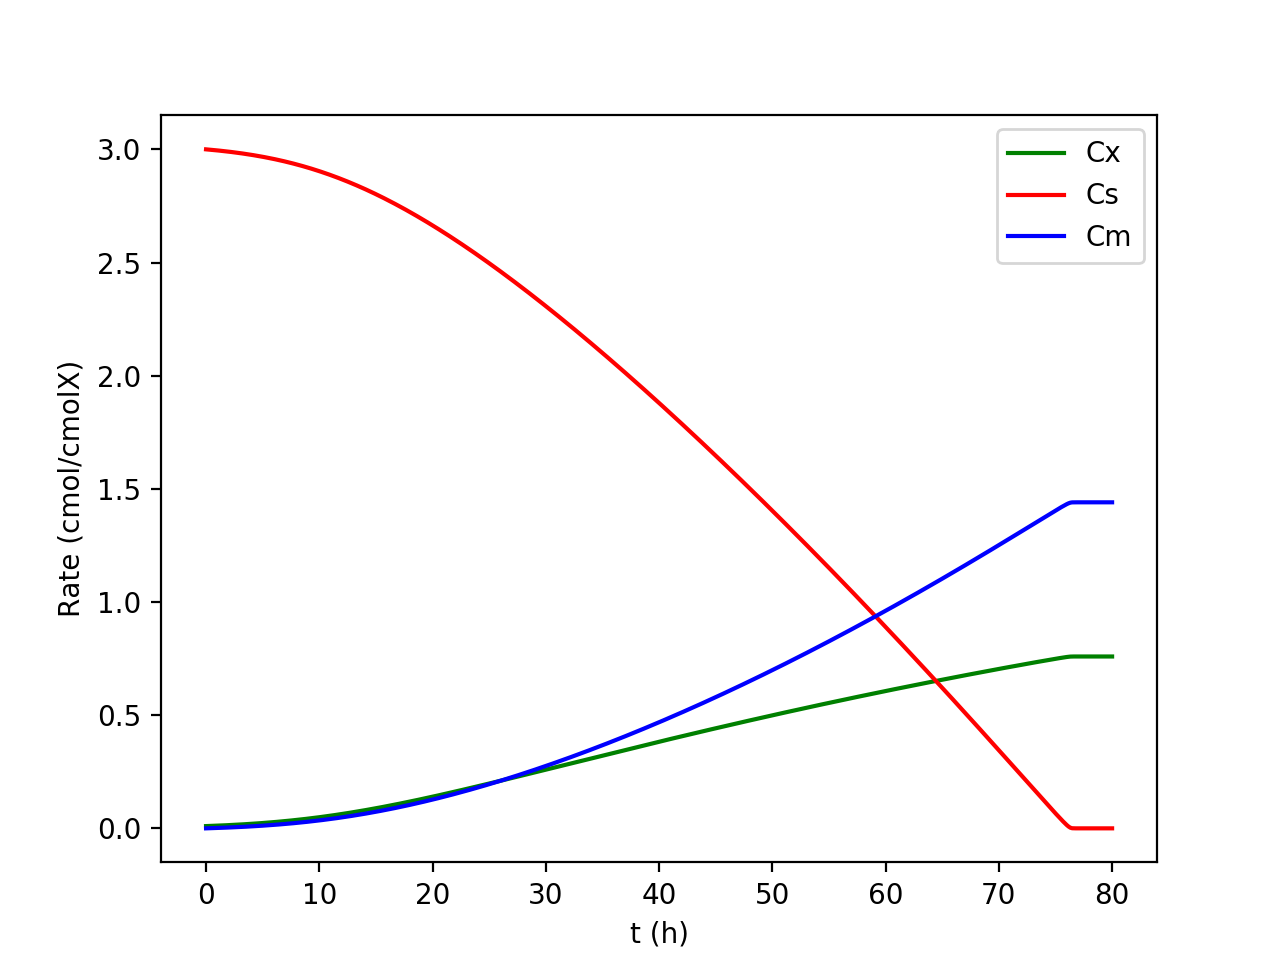

In [71]:
plt.figure(3)
plt.plot(tspan, Cx, color = 'green', label = 'Cx')
plt.plot(tspan, Cs, color = 'red', label = 'Cs')
plt.plot(tspan, Cm, color = 'blue', label = 'Cm')
plt.xlabel('t (h)')
plt.ylabel('Rate (cmol/cmolX)')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [72]:
from scipy.stats import linregress 
from numpy import array

In [74]:
Cx1 = array([(interp(14,tspan,Cx)),(interp(15,tspan,Cx)),(interp(16,tspan,Cx))])
Tspan = array([14,15,16])

slope, intercept, r_value, p_value, std_err = linregress(Tspan, Cx1)

print(slope)


0.009203074537361404


In [75]:
Cs1 = array([(interp(14,tspan,Cs)),(interp(15,tspan,Cs)),(interp(16,tspan,Cs))])
Tspan1 = array([14,15,16])

slope, intercept, r_value, p_value, std_err = linregress(Tspan1, Cs1)

print(slope)

-0.024151372632562836


In [78]:
Cm1 = array([(interp(14,tspan,Cm)),(interp(15,tspan,Cm)),(interp(16,tspan,Cm))])
Tspan2 = array([14,15,16])

slope, intercept, r_value, p_value, std_err = linregress(Tspan2, Cm1)

print(slope)

0.009229286100478531


In [80]:
Cx2 = array([(interp(74,tspan,Cx)),(interp(75,tspan,Cx)),(interp(76,tspan,Cx))])
Tspan3 = array([74,75,76])

slope, intercept, r_value, p_value, std_err = linregress(Tspan3, Cx2)

print(slope)

0.00830884852644398


In [81]:
Cs2 = array([(interp(74,tspan,Cs)),(interp(75,tspan,Cs)),(interp(76,tspan,Cs))])
Tspan4 = array([74,75,76])

slope, intercept, r_value, p_value, std_err = linregress(Tspan4, Cs2)

print(slope)

-0.0535408245884114


In [82]:
Cm2 = array([(interp(74,tspan,Cm)),(interp(75,tspan,Cm)),(interp(76,tspan,Cm))])
Tspan5 = array([74,75,76])

slope, intercept, r_value, p_value, std_err = linregress(Tspan5, Cm2)

print(slope)

0.029489942825862592


e) Compare the answers in (d) to the $r_{i}^{V}$ values in your table. What do you see?

It should be the same because the units of C divided by time is $cmoli/L.h$, same as the volumetric rate for a specie.
The results from the linregress slope is very close to the calculated $r_{i}^{V}$

f) Determine the 3 concentrations at 36 hours. Use the following command before plotting the profiles and read the concentrations directly off the plot. Note the coordinates of the curser are indicated on the plot.

%matplotlib notebook 

In [84]:
print('Cs at 36h=', 2.053, 'Cx at 36h=', 0.334, 'Cm at 36h=', 0.381) #read off the graph

Cs at 36h= 2.053 Cx at 36h= 0.334 Cm at 36h= 0.381


g) Compare your visual inspected answers to the correct answers by using a tspan that contains 36 hours. For exam purpuses you should be in the range: $0.97<\frac{C_{read}}{C_{correct}}<1.03$



In [89]:
C36hrs = [[interp(36,tspan,Cx)],
       [interp(36,tspan,Cs)],
       [interp(36,tspan,Cm)]]

C36hrs

[[0.3338167657253419], [2.0572248063007477], [0.38673361072457924]]

h) Obtain the values of $r_X,r_S,r_M$ at 36 hours. [0.0369, -0.1300,  0.0592]

In [88]:
r36hrs = [[interp(36,tspan,rx)],
       [interp(36,tspan,rs)],
       [interp(36,tspan,rm)]]

r36hrs

[[0.036909835679478156], [-0.13007625421552935], [0.059158158836342525]]

i) What will $r_X,r_S,r_M$ be at 36 hours if $C_M$ was 0.75 $\frac{cmol}{L}$ more than the coordinate in (e)? The other concentrations remain the same. **perform calculation without integration!** [0.0145, -0.0825, 0.04415]

<img src="notonprofile.png" width="400" />

In [90]:
rates36 = response_fun([0.3338167657253419,2.0572248063007477,1.13673
])
rates36

[0.014526266292799848, -0.08249959184529607, 0.04415344906490682]